# Candlestick Counterattack

https://patternswizard.com/concealing-baby-swallow-candlestick-pattern/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'MU'
start = '2018-01-01'
end = '2021-10-11'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,41.540001,43.720001,41.189999,43.669998,43.609039,37097000
2018-01-03,44.500000,45.049999,44.049999,44.980000,44.917213,43376700
2018-01-04,45.990002,46.980000,45.009998,46.880001,46.814564,52229500
2018-01-05,46.130001,46.660000,45.380001,45.799999,45.736069,47381100
2018-01-08,45.310001,46.090000,44.910000,45.549999,45.486416,32217400


## Candlestick with Counterattack

In [3]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,41.540001,43.720001,41.189999,43.669998,43.609039,37097000,True
1,736697.0,44.500000,45.049999,44.049999,44.980000,44.917213,43376700,True
2,736698.0,45.990002,46.980000,45.009998,46.880001,46.814564,52229500,True
3,736699.0,46.130001,46.660000,45.380001,45.799999,45.736069,47381100,False
4,736702.0,45.310001,46.090000,44.910000,45.549999,45.486416,32217400,True


Text(0, 0.5, 'Price')

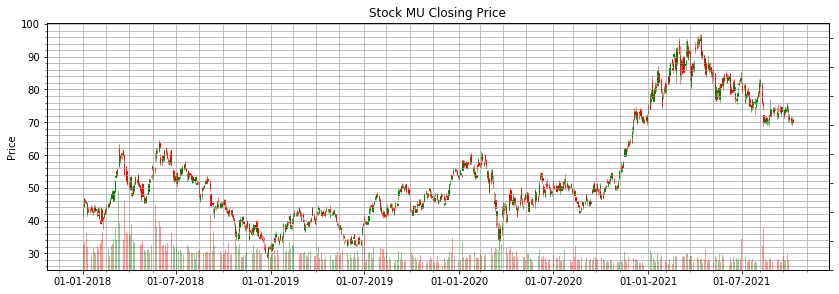

In [4]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

In [5]:
Counterattack = talib.CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Close'])

Counterattack = Counterattack[Counterattack != 0]

In [6]:
df['Counterattack'] = talib.CDLCOUNTERATTACK(df['Open'], df['High'], df['Low'], df['Close'])

In [7]:
df.loc[df['Counterattack'] !=0]

,Open,High,Low,Close,Adj Close,Volume,Counterattack
Date,,,,,,,
2018-03-13,62.169998,63.419998,58.520000,59.430000,59.347042,142315800,-100
2018-05-30,63.700001,64.660004,60.919998,62.570000,62.482658,84737600,-100
2018-08-17,46.209999,47.360001,45.619999,47.110001,47.044239,34464200,100
2020-03-20,37.770000,38.590000,35.840000,36.110001,36.059597,37667400,-100
2020-12-21,70.000000,71.699997,69.650002,71.470001,71.370239,13180400,100
2021-08-02,79.040001,79.489998,77.470001,77.639999,77.531624,14904200,-100


In [8]:
df['Adj Close'].loc[df['Counterattack'] !=0]

Date
2018-03-13    59.347042
2018-05-30    62.482658
2018-08-17    47.044239
2020-03-20    36.059597
2020-12-21    71.370239
2021-08-02    77.531624
Name: Adj Close, dtype: float64

In [9]:
df['Adj Close'].loc[df['Counterattack'] !=0].index

DatetimeIndex(['2018-03-13', '2018-05-30', '2018-08-17', '2020-03-20',
               '2020-12-21', '2021-08-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [10]:
Counterattack

Date
2018-03-13   -100
2018-05-30   -100
2018-08-17    100
2020-03-20   -100
2020-12-21    100
2021-08-02   -100
dtype: int32

In [11]:
Counterattack.index

DatetimeIndex(['2018-03-13', '2018-05-30', '2018-08-17', '2020-03-20',
               '2020-12-21', '2021-08-02'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume,Counterattack
Date,,,,,,,
2018-01-02,41.540001,43.720001,41.189999,43.669998,43.609039,37097000,0
2018-01-03,44.500000,45.049999,44.049999,44.980000,44.917213,43376700,0
2018-01-04,45.990002,46.980000,45.009998,46.880001,46.814564,52229500,0
2018-01-05,46.130001,46.660000,45.380001,45.799999,45.736069,47381100,0
2018-01-08,45.310001,46.090000,44.910000,45.549999,45.486416,32217400,0
...,...,...,...,...,...,...,...
2021-10-04,70.599998,71.570000,70.360001,70.620003,70.620003,19525700,0
2021-10-05,71.209999,71.209999,69.610001,70.500000,70.500000,14512100,0
2021-10-06,69.800003,70.379997,69.029999,69.940002,69.940002,17899300,0


Text(0, 0.5, 'Price')

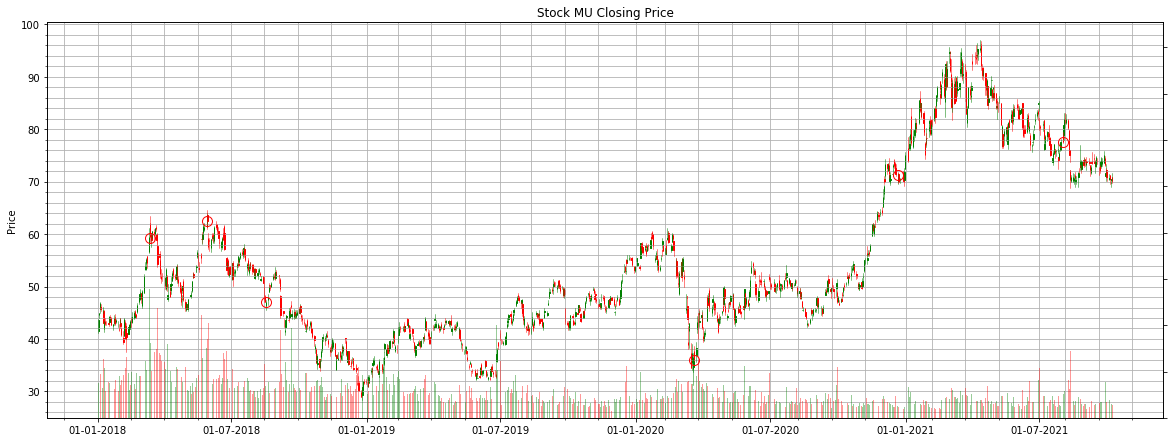

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax.grid(True, which='both')
ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Counterattack'] !=0].index, df['Adj Close'].loc[df['Counterattack'] !=0],
                'or', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=10.0) 
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

## Plot Certain dates

In [14]:
df = df['2018-05-28':'2018-08-25']
dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Counterattack,VolumePositive
0,736843.0,61.360001,63.980000,61.349998,62.619999,62.532589,75591900,0,True
1,736844.0,63.700001,64.660004,60.919998,62.570000,62.482658,84737600,-100,False
2,736845.0,59.230000,60.250000,57.169998,57.590000,57.509613,101882200,0,False
3,736846.0,58.810001,59.340000,56.880001,58.740002,58.658009,74761500,0,False
4,736849.0,57.430000,59.160000,56.619999,59.099998,59.017502,64350500,0,True


Text(0, 0.5, 'Price')

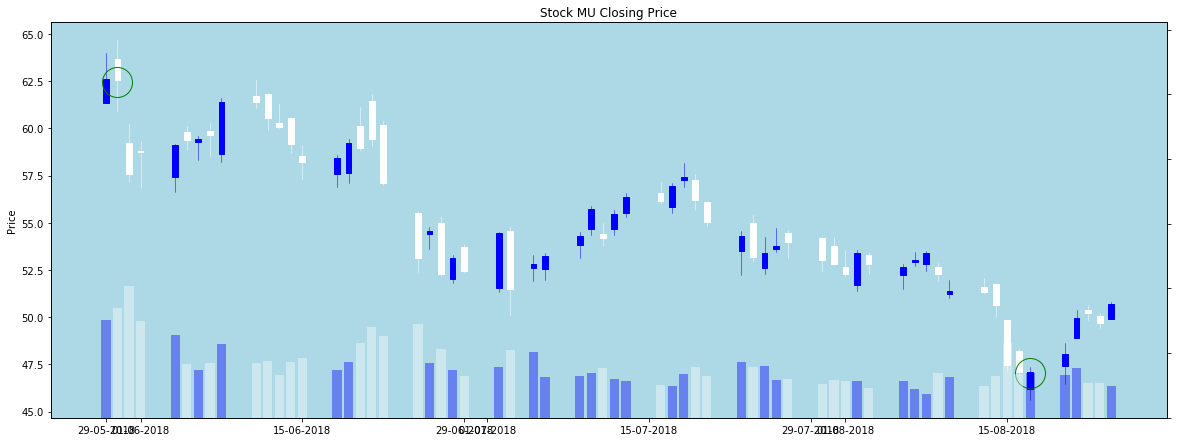

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
ax.set_facecolor('lightblue')
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='b', colordown='w', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.plot_date(df['Adj Close'].loc[df['Counterattack'] !=0].index, df['Adj Close'].loc[df['Counterattack'] !=0],
                'og', # marker style 'o', color 'g'
                fillstyle='none', # circle is not filled (with color)
                ms=30.0) 
colors = dfc.VolumePositive.map({True: 'b', False: 'w'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')

# Highlight Candlestick

Text(0, 0.5, 'Price')

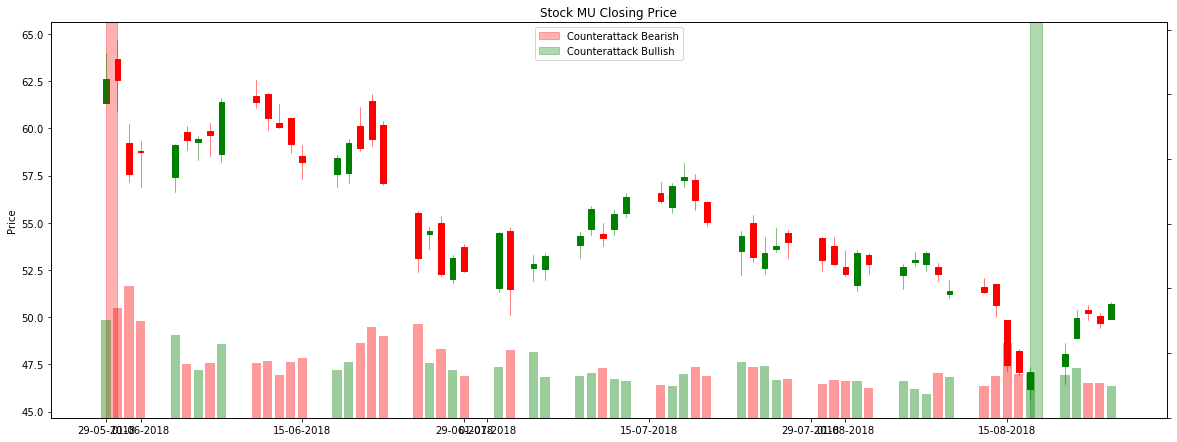

In [16]:
from matplotlib.dates import date2num
from datetime import datetime

fig = plt.figure(figsize=(20,16))
ax = plt.subplot(2, 1, 1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
#ax.grid(True, which='both')
#ax.minorticks_on()
axv = ax.twinx()
ax.axvspan(date2num(datetime(2018,5,29)), date2num(datetime(2018,5,30)), 
           label="Counterattack Bearish",color="red", alpha=0.3)
ax.axvspan(date2num(datetime(2018,8,17)), date2num(datetime(2018,8,18)), 
           label="Counterattack Bullish",color="green", alpha=0.3)
ax.legend(loc='upper center')
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
axv.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
axv.axes.yaxis.set_ticklabels([])
axv.set_ylim(0, 3*df.Volume.max())
ax.set_title('Stock '+ symbol +' Closing Price')
ax.set_ylabel('Price')